# Ch. 5

In [1]:
# minimal imports
import pandas as pd
import numpy as np
from plotnine import *
import plotnine.options as p9options

# for graphical enhancement
from mizani.labels import label_date, label_dollar, label_percent, label_comma
from mizani.palettes import brewer_pal
from pysocviz.properties import dcolors

p9options.figure_size = (5.4, 4.8)
theme_set(theme_minimal())

In [2]:
# to handle with categorical variables with na
from pysocviz.utils import redefine_cat_with_na

# you may need them If only you are adhere to color determination...
from matplotlib.pylab import cm
from matplotlib.colors import rgb2hex

# dataset packages
from pysocviz.loader import load_dataset
from gapminder import gapminder

gss_sm = load_dataset('gss_sm')
organdata = load_dataset('organdata')
# transform to a categorical variable
organdata['world'] = pd.Categorical(
    organdata['world'].str.replace('nan', 'NA'),
    ['Liberal', 'Corporatist', 'SocDem', 'NA']
)
elections_historic = load_dataset('elections_historic')

## Fig. 5.2

NOTE: As same as Fig. 4.9, I set manual color mapping.

In [3]:
rel_by_region = gss_sm.assign(
    N=1,
    religion=lambda d: redefine_cat_with_na(d['religion'])
).groupby(['bigregion', 'religion'])['N'].count()

rel_by_region = pd.DataFrame(
  {
    'N': rel_by_region,
    'freq': rel_by_region / rel_by_region.reset_index(
      ).groupby(['bigregion'])['N'].sum()
  }
).assign(pct=lambda d: (d['freq'] * 100).round(0)).reset_index()

TypeError: Cannot setitem on a Categorical with a new category (NA), set the categories first

In [ ]:
religion_colors = brewer_pal(type='qual', palette='Set1')(gss_sm['religion'].unique().shape[0])
religion_colors = dict(zip(gss_sm['religion'].unique(), religion_colors))
religion_colors['NA'] = '#595959'

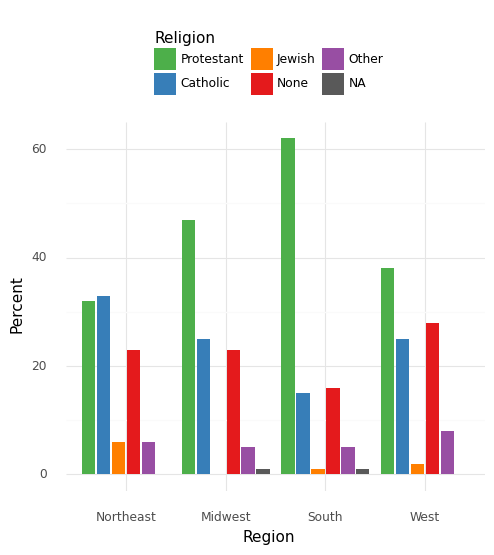

<ggplot: (8739715831281)>

In [ ]:
p = ggplot(rel_by_region, aes(x='bigregion', y='pct', fill='religion'))
p + geom_col(position='dodge2') + labs(
  x="Region",
  y="Percent",
  fill="Religion"
) + theme(legend_position="top"
) + scale_fill_manual(religion_colors)

## Fig. 5.3

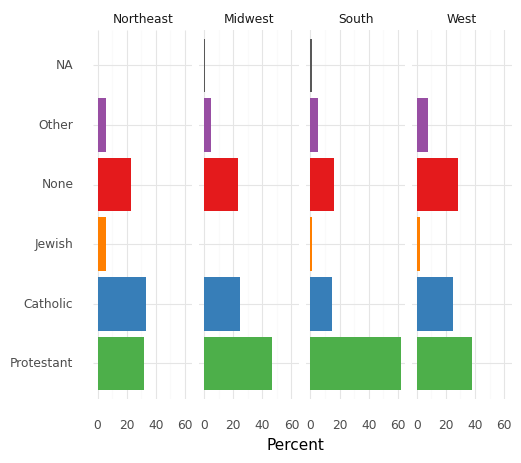

<ggplot: (8739706437313)>

In [ ]:
p = ggplot(rel_by_region, aes(x='religion', y='pct', fill='religion'))
p + geom_col(position="dodge2") + labs(
  x=None,
  y="Percent",
  fill="Religion"
) + guides(fill=False) + coord_flip(
) + facet_grid(['.', 'bigregion']
) + scale_fill_manual(religion_colors)

## Fig. 5.4

NOTE: Currently (v0.8) Plotnine doesn't automatically adjust datetime label formats in the each axis (`year` variable used in Ch.4 is integer). So in this notebook I manually adjusted by adding `scale_x_date()` with `date_lables` arguments. `scale_x_date` is an alias of `scale_x_datetime`.

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


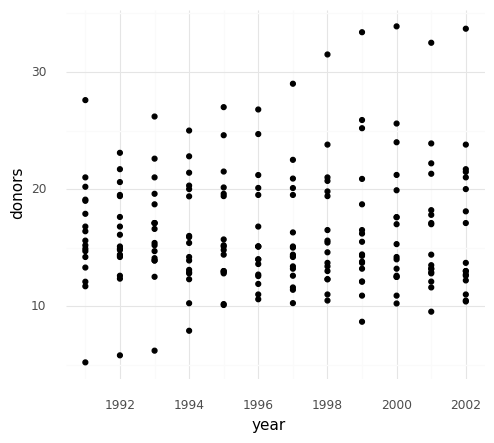

<ggplot: (8739701731943)>

In [ ]:
p = ggplot(organdata, aes(x='year', y='donors'))
p + geom_point() + scale_x_date(date_labels='%Y')

## Fig. 5.5

NOTE: Currently (v0.8) sometimes manually thinning of breaks needed. In this sace, I specify `date_breaks='5 years'` which means the breaks are displayed by 5 years. This works only when the x-axis is a datetime type variable.

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 2 rows containing missing values.


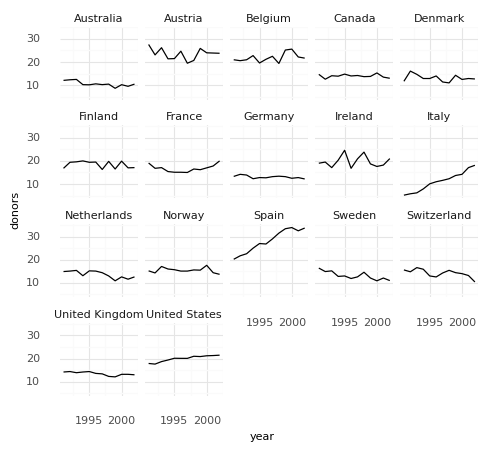

<ggplot: (8739701678132)>

In [ ]:
p = ggplot(organdata, aes(x='year', y='donors'))
p + geom_line(
  aes(group='country')
) + facet_wrap(['country']
) + scale_x_date(date_labels='%Y', date_breaks='5 years') + theme(
    text=element_text(size=8)
)

## Fig. 5.6

NOTE: In the online version of the original book, axis labels are overlapped, but in the paper version, the author adjust by using `theme()` function. So I also use text rotation in the following example. (in ggplot2, argument name `angle` but in plotnine, the counterpart is named as `rotation`)

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 34 rows containing non-finite values.


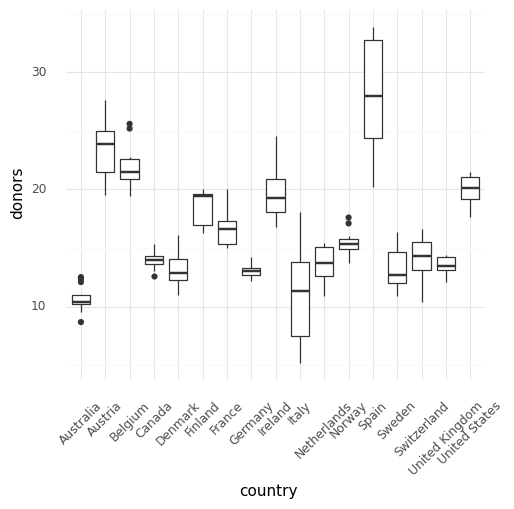

<ggplot: (8739657785215)>

In [ ]:
p = ggplot(organdata, aes(x='country', y='donors'))
p + geom_boxplot() + theme(
    axis_text_x=element_text(rotation=45)
)

## Fig. 5.7

NOTE: In the latest **ggplot2** (=>3.0.0), you don't have to use `coord_flip()` and just specify x/y axis inversely in `aes()`. But currently (v0.8) plotnine doesn't support this feature.

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 34 rows containing non-finite values.


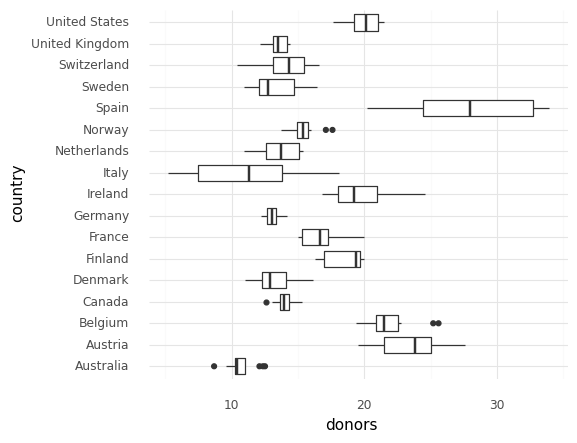

<ggplot: (8739657682243)>

In [ ]:
p = ggplot(organdata, aes(x='country', y='donors'))
p + geom_boxplot() + coord_flip()

## Fig. 5.8

NOTE: Differnt from ggplot2, plotnine's `reorder` function doesn't take any optional arguments, so in the following plot, the order of countries are wrong. 

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 34 rows containing non-finite values.


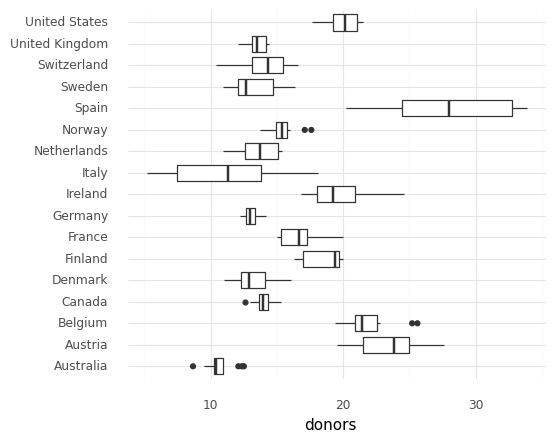

<ggplot: (8739699114969)>

In [ ]:
p = ggplot(organdata, aes(x='reorder(country, donors)', y='donors'))
p + geom_boxplot() + labs(x=None) + coord_flip()

So, you need to manually summarise the data in order to find the true order of donors in mean and apply it:

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 34 rows containing non-finite values.


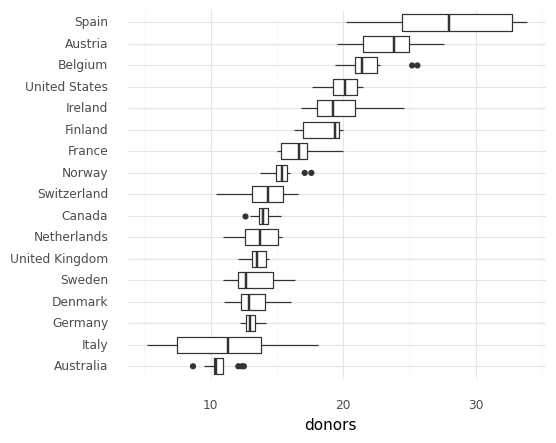

<ggplot: (8739715746181)>

In [ ]:
order_countries = organdata.groupby('country')[['donors']].mean(
).sort_values('donors', ascending=True).assign(
    rank_donors=lambda d: range(d.shape[0])
)[['rank_donors']].reset_index()

p = ggplot(
    organdata.merge(order_countries, on='country'),
    aes(x='reorder(country, rank_donors)', y='donors'))
p + geom_boxplot() + labs(x=None) + coord_flip()

## Fig. 5.9

In [ ]:
# manual color mapping
world_colors = brewer_pal('qualitative', 'Set1')(organdata['world'].unique().shape[0])
world_colors = dict(zip(organdata['world'].unique(), world_colors))
world_colors['NA'] = '#595959'

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 34 rows containing non-finite values.


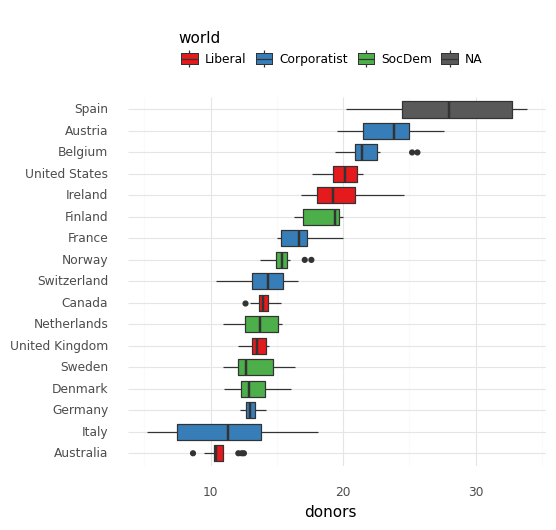

<ggplot: (8739657599991)>

In [ ]:
p = ggplot(
    organdata.merge(order_countries, on='country'),
    aes(x='reorder(country, rank_donors)', y='donors', fill='world')
)
p + geom_boxplot() + labs(x=None) + coord_flip(
) + theme(legend_position='top') + scale_fill_manual(world_colors)

## Fig. 5.10

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


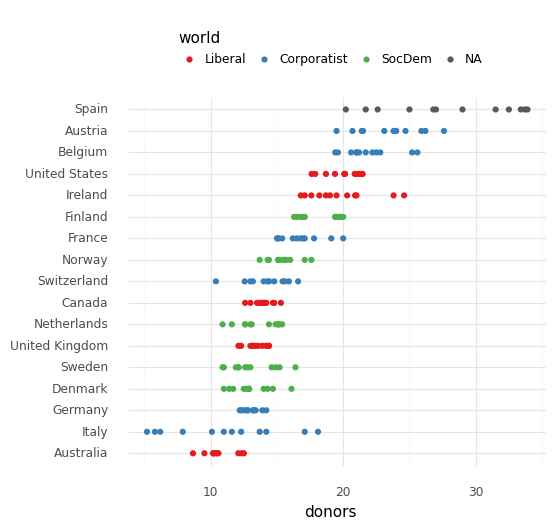

<ggplot: (8739657500919)>

In [ ]:
p = ggplot(
    organdata.merge(order_countries, on='country'),
    aes(x='reorder(country, rank_donors)', y='donors', color='world')
)
p + geom_point() + labs(x=None) + coord_flip() + theme(legend_position="top"
) + scale_color_manual(world_colors)

## Fig. 5.11

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_jitter : Removed 34 rows containing missing values.


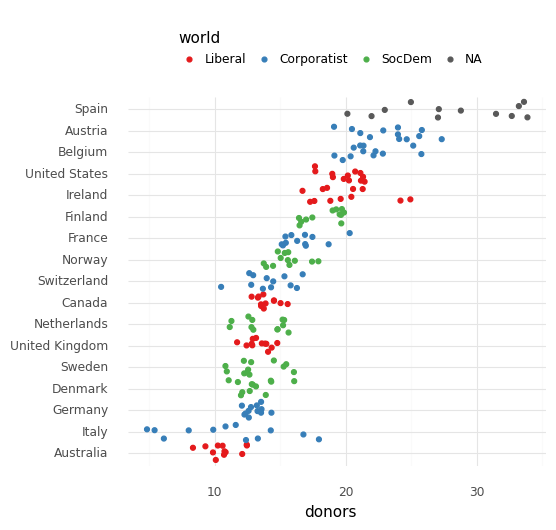

<ggplot: (8739701744110)>

In [ ]:
p = ggplot(
    organdata.merge(order_countries, on='country'),
    aes(x='reorder(country, rank_donors)', y='donors', color='world')
)
p + geom_jitter() + labs(x=None) + coord_flip() + theme(legend_position="top"
) + scale_color_manual(world_colors)

## Fig. 5.12

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_jitter : Removed 34 rows containing missing values.


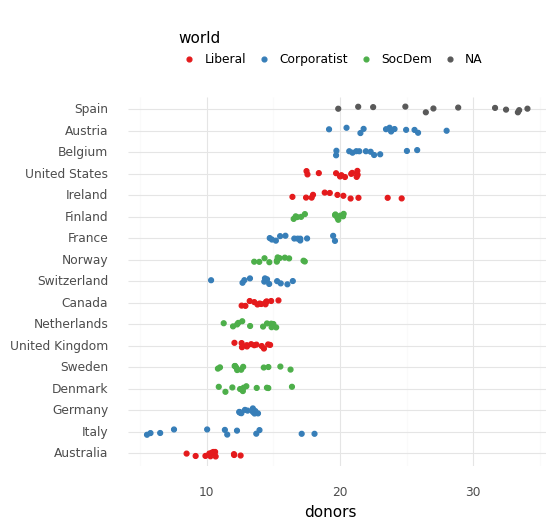

<ggplot: (8739657438874)>

In [ ]:
p = ggplot(
    organdata.merge(order_countries, on='country'),
    aes(x='reorder(country, rank_donors)', y='donors', color='world')
)
p + geom_jitter(position=position_jitter(width=0.15)) + labs(
  x=None
) + coord_flip() + theme(legend_position="top"
) + scale_color_manual(world_colors)

## Fig. 5.13

In [ ]:
by_country = organdata.groupby(
  ['consent_law', 'country']).agg(['mean', 'std']
).reset_index()
by_country.columns = [
  '_'.join(filter(lambda x: x !='', t)) for t in by_country.columns
]
by_country = by_country.rename(columns={'donors_std': 'donors_sd'})

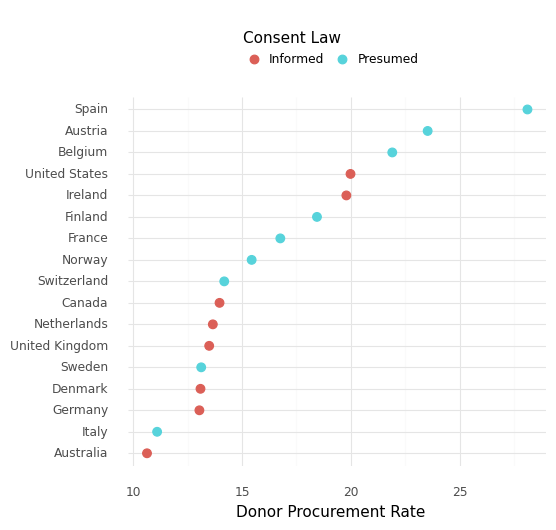

<ggplot: (8739657499408)>

In [ ]:
p = ggplot(
  by_country,
  aes(x='donors_mean', y='reorder(country, donors_mean)', color='consent_law')
)
p + geom_point(size=3) + labs(
  x="Donor Procurement Rate",
  y="",
  color="Consent Law"
  ) + theme(legend_position="top")


## Fig. 5.14

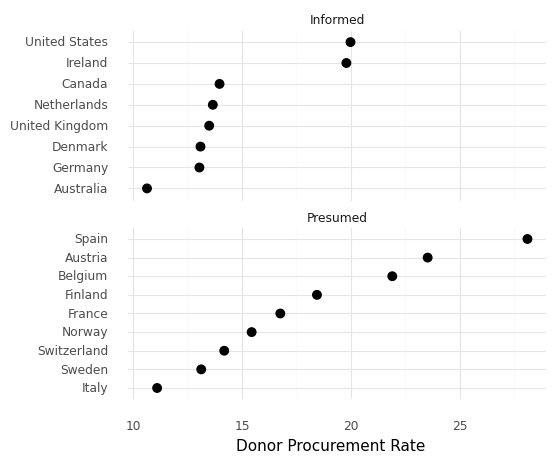

<ggplot: (8739657405624)>

In [ ]:
p = ggplot(
    by_country,
    aes(x='donors_mean', y='reorder(country, donors_mean)')
)
p + geom_point(size=3) + facet_wrap(
  'consent_law', scales="free_y", ncol=1
) + labs(
  x="Donor Procurement Rate",
  y=""
)

## Fig. 5.15

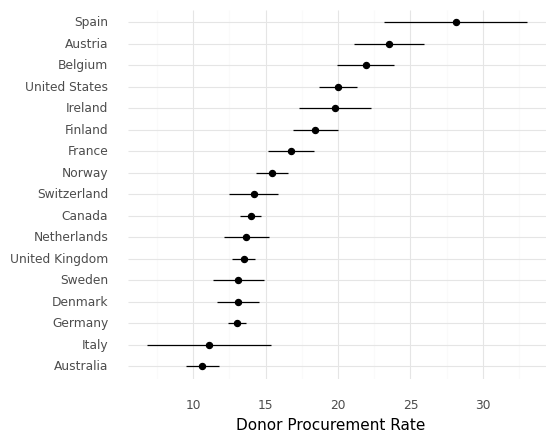

<ggplot: (8739657254063)>

In [ ]:
p = ggplot(
    by_country,
    aes(x='reorder(country, donors_mean)', y='donors_mean')
)
p + geom_pointrange(
  aes(ymin='donors_mean - donors_sd',
      ymax='donors_mean + donors_sd')
) + labs(
  x="", y="Donor Procurement Rate") + coord_flip()

## Fig. 5.16

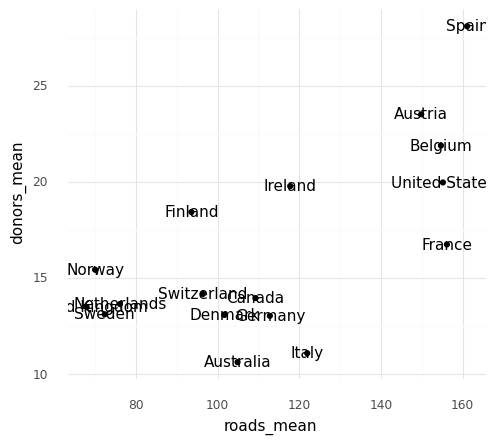

<ggplot: (8739657702666)>

In [ ]:
p = ggplot(by_country, aes(x='roads_mean', y='donors_mean'))
p + geom_point() + geom_text(aes(label='country'))

## Fig. 5.17

NOTE: you need to specify `ha` instaed of `hjust`. Similary `vjust` needs to be replaced with `va`.

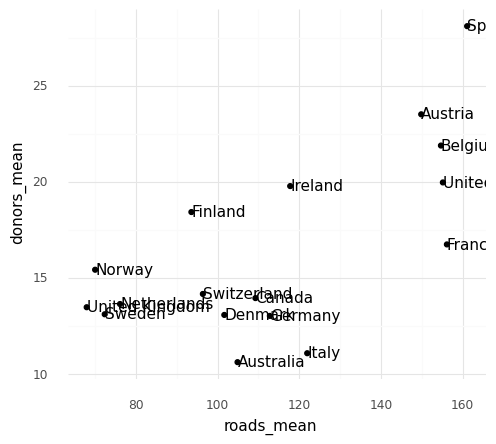

<ggplot: (8739657899852)>

In [ ]:
p = ggplot(by_country, aes(x='roads_mean', y='donors_mean'))
p + geom_point() + geom_text(aes(label='country'), ha='left')

## Fig. 5.18

NOTE: Currently (v0.8) `ggrepel::geom_text_repel` is not available in plotnine.
Alternatively you can use `adjust_text` argument with adjustText package,
but this is not a complete substitution of ggrepel.

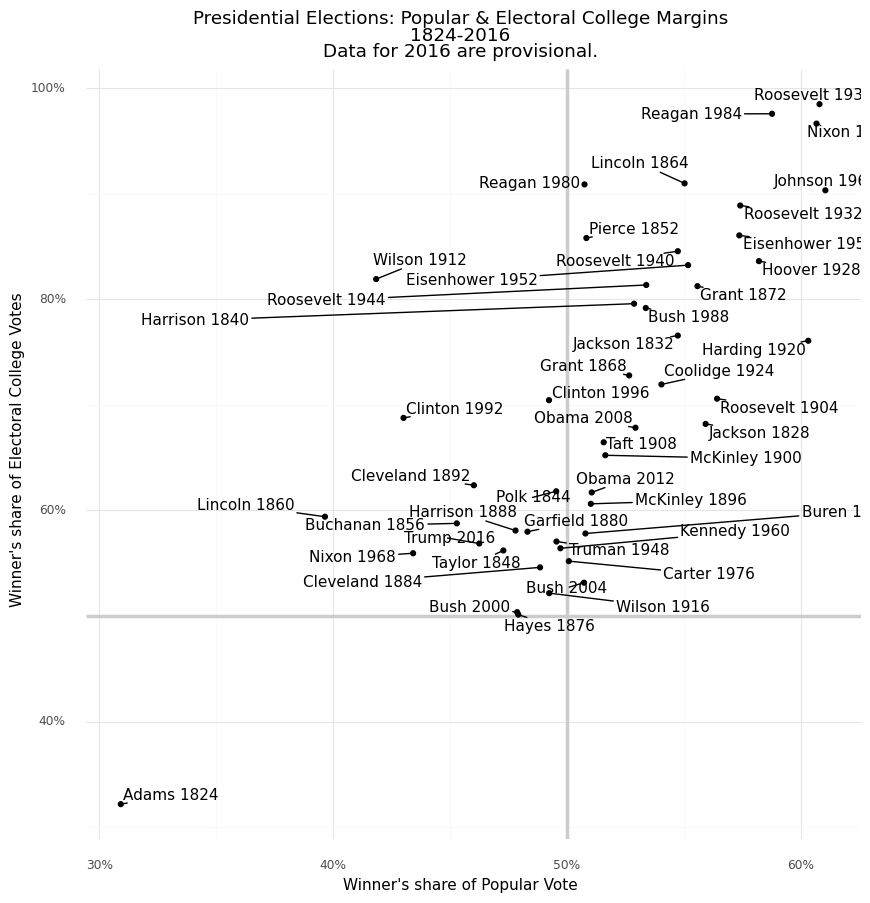

<ggplot: (8739743131636)>

In [ ]:
p_title = "Presidential Elections: Popular & Electoral College Margins"
p_subtitle = "1824-2016"
p_caption = "Data for 2016 are provisional."
x_label = "Winner's share of Popular Vote"
y_label = "Winner's share of Electoral College Votes"

p = ggplot(
  elections_historic,
  aes(x='popular_pct', y='ec_pct', label='winner_label')
)
p + geom_hline(
  yintercept=0.5, size=1.4, color=dcolors.get('gray80')
  ) + geom_vline(
    xintercept=0.5, size=1.4, color=dcolors.get('gray80')
  ) + geom_point() + geom_text(
    nudge_x=0.1, nudge_y=0.1, adjust_text={'arrowprops': {'arrowstyle': '-'}}
  ) + scale_x_continuous(
    labels=label_percent()
  ) + scale_y_continuous(
    labels=label_percent()
  ) + labs(
    x=x_label,
    y=y_label,
    title='\n'.join([p_title, p_subtitle, p_caption]),
    subtitle=p_subtitle,
    caption=p_caption
) + theme(figure_size = (10, 10))

## Fig. 5.19

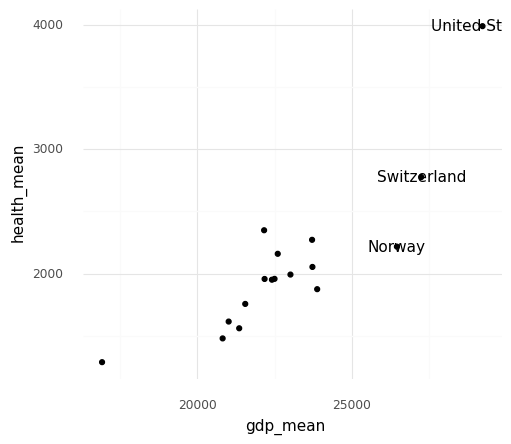

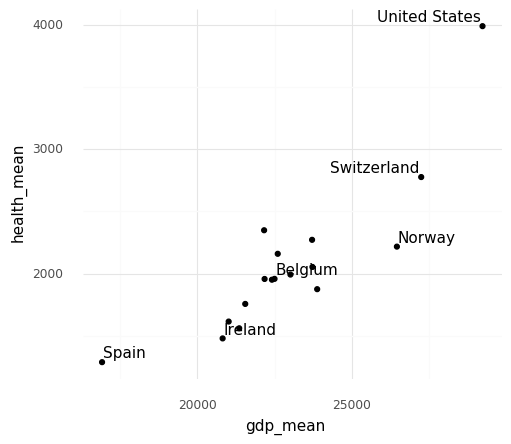

In [ ]:
p = ggplot(by_country, aes(x='gdp_mean', y='health_mean'))
(
  p + geom_point() + geom_text(
    by_country.loc[lambda d: d['gdp_mean'] > 25000],
    aes(label='country')
  )
).draw();

p = ggplot(by_country, aes(x='gdp_mean', y='health_mean'))
(
  p + geom_point(
  ) + geom_text(
    by_country.loc[lambda d: (d['gdp_mean'] > 25000) | (
      d['health_mean'] < 1500
    ) | (d['country'].isin(['Belgium']))],
    aes(label='country'),
    adjust_text={'arrowproprs': {'arrowstyle': '-'}}
  )
).draw();

## Fig. 5.20

In [ ]:
organdata = organdata.assign(ind=lambda d: (
  d['ccode'].isin(['Ita', 'Spa'])) & (d['year'].dt.year > 1998))

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


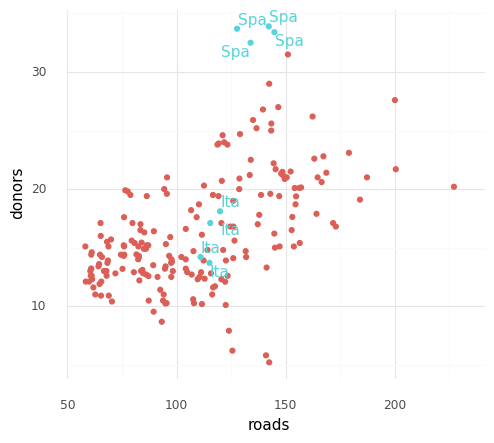

<ggplot: (8739657931126)>

In [ ]:
p = ggplot(organdata, aes(x='roads', y='donors', color='ind'))
p + geom_point() + geom_text(
  organdata.loc[lambda d: d['ind']],
  aes(label='ccode'),
  adjust_text={'arrowproprs': {'arrowstyle': '-'}}
  ) + guides(
  label=False, color=False)

## Fig. 5.21

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


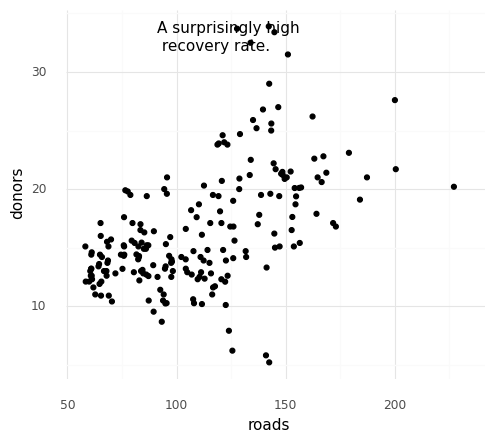

<ggplot: (8739657786257)>

In [ ]:
p = ggplot(organdata, aes(x='roads', y='donors'))
p + geom_point(
) + annotate(
  geom="text", x=91, y=33,
  label="A surprisingly high \n recovery rate.",
  ha='left'
)

## Fig. 5.22

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


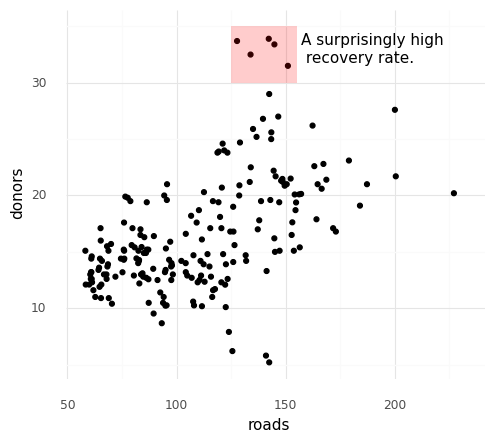

<ggplot: (8739743130441)>

In [ ]:
p = ggplot(organdata, aes(x='roads', y='donors'))
p + geom_point() + annotate(
  geom='rect', xmin=125, xmax=155,
  ymin=30, ymax=35, fill='red', alpha=0.2
) + annotate(
  geom='text', x=157, y=33,
  label = "A surprisingly high \n recovery rate.",
  ha = 'left'
)

## Fig. 5.23

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


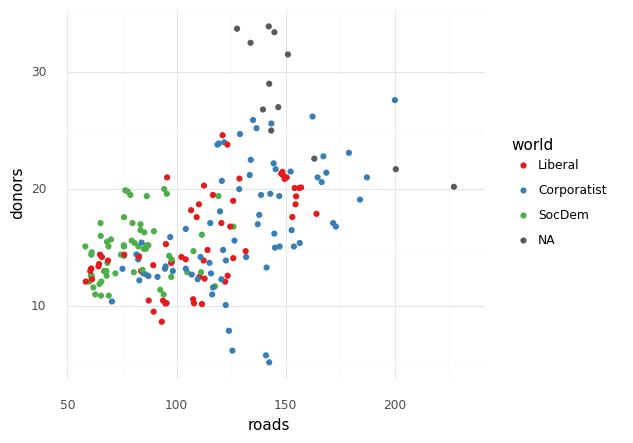

<ggplot: (8739696436237)>

In [ ]:
p = ggplot(organdata, aes(x='roads', y='donors', color='world'))
p + geom_point() + scale_color_manual(world_colors)

## Fig. 5.25

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


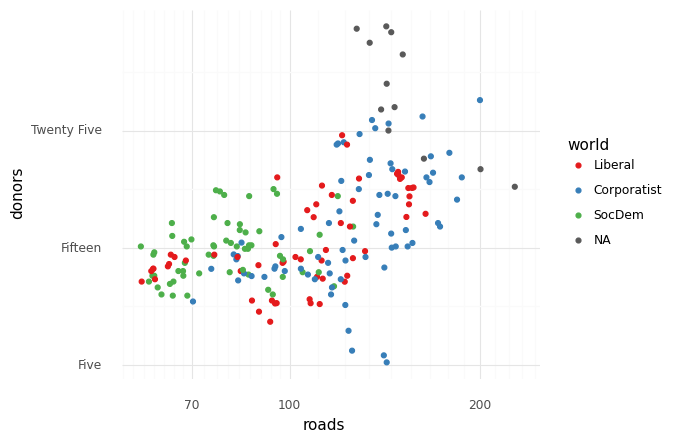

<ggplot: (8739657903695)>

In [ ]:
p = ggplot(organdata, aes(x='roads', y='donors', color='world'))
p + geom_point() + scale_x_log10(
) + scale_y_continuous(
  breaks = [5, 15, 25],
  labels = ["Five", "Fifteen", "Twenty Five"]
) + scale_color_manual(world_colors)

## Fig. 5.26

NOTE: I deem that the original code is not good in the view of consistency of value-label correspondings. So I changed the labels by using dictionary which is independent from the order of observeations in the input dataset.

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


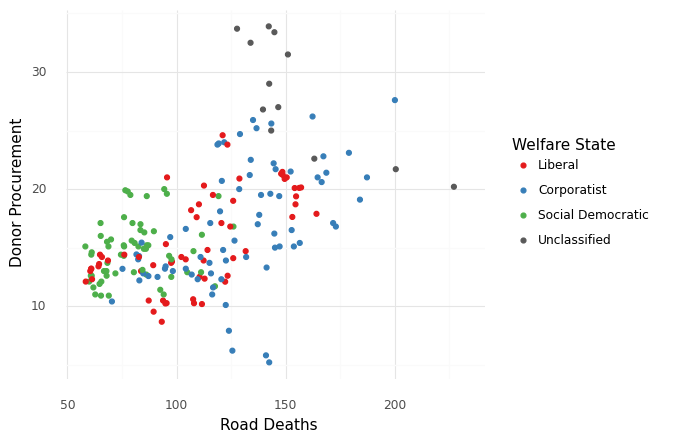

<ggplot: (8739696432397)>

In [ ]:
p = ggplot(organdata, aes(x='roads', y='donors', color='world'))
p + geom_point() + scale_color_manual(
    world_colors,
    labels = lambda x: [{"Corporatist": "Corporatist",
                         "Liberal": "Liberal",
                         "SocDem": "Social Democratic",
                         "NA": "Unclassified"}[e] for e in x]
) + labs(
  x="Road Deaths",
  y="Donor Procurement",
  color="Welfare State")

## Fig. 5.27

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


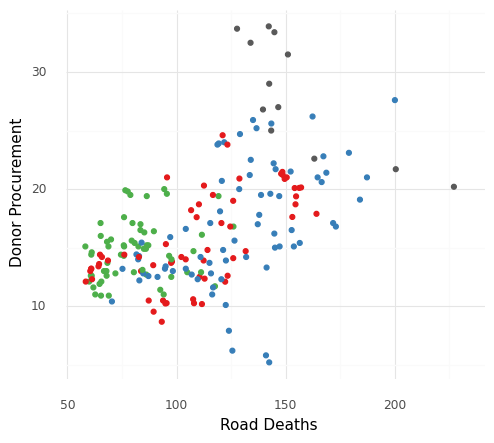

<ggplot: (8739657892244)>

In [ ]:
p = ggplot(
  organdata,
  aes(x='roads', y='donors', color='world'))
p + geom_point() + labs(
  x="Road Deaths",
  y="Donor Procurement") + guides(color=False
) + scale_color_manual(world_colors)